##Time to be spies

**Encryption** is the process of transforming *plaintext* into *ciphertext*. **Decryption** is the process that turns *ciphertext* back into *plaintext*.

There are *a ton* of different algorithms to encrypt and decrypt text. One of the most famous ones is called **Caesar Cipher**, apparently having been used by famed general Julius Caesar.

The way that it works is that each letter in the message is replaced by the letter which is **n** places further through the alphabet. **N** is some number between 1 and 25; it is what we call a **key** since it is the piece of information needed to decode an encoded message.


You might have seen a wheel that looks something like this that can be used to figure out which letters correspond to which:

</br>

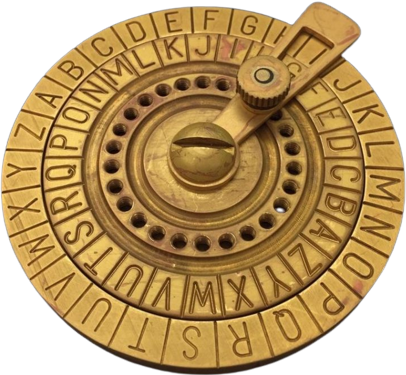


</br>

####*Example*

Say, we had the message `attack at dawn` and used the key **5**.

We're going to assign every letter of the alphabet a number, starting at 0 (computer scientists like to start from 0). The letter 'a' is the first letter in our message, and it has the value  **0** . If we add 5 to that (our key), we get **5**; if we move through the alphabet b-1, c-2, d-3, e-4, **f-5**.... we find that 'f' should be the new letter.

So, everytime we see an 'a' in our plaintext, we'll use an 'f' in our ciphertext. For now, we'll leave spaces alone and assume everything is lowercase

This means that `attack at dawn` becomes `fyyfhp fy ifbs`

Notice that in the case of letters near the end of the alphabet like `w`, we loop back around to the beginning. For decoding, we do the reverse - subtracting the key from the letter's value. Here, if we get a negative number, we wrap around from the end (i.e. -2 is y)


###Your turn!

Try completing the below code to encode and decode text! In this implementation, we'll only use lowercase and we'll leave spaces alone.


To help you out, we've given you two functions: `char_to_num` and `num_to_char`. The former converts a letter (1 character string) in the lowercase alphabet (a-z) to a number from 0 to 25. The latter reverses the process; given a number between 0 and 25, it will return the equivalent letter (as a string).

You should use these to help you implement functions for encoding and decoding text. We've provided you with some function headers and test code. If you prefer not to use functions, or to modify the headers, you can absolutely choose to do so!


Make sure you read the comments in the given functions to ensure you know what's happening.


In [ ]:

#this turns letters a-z into numbers (0-25)
#for now, we're only going to work with lowercase
#it will be cranky and throw an error if you try to do anything else
#each charcter on your keyboard has an corresponding number value used by computers
#this is called an ascii value, and it's what the ord function returns for us
#the ascii value for lowercase a is 97, which is why we are subtracting 97 from each ascii value to force our mappings into the range [0,25]
def char_to_num(c):
  val = ord(c)
  assert val > 96 and val<123
  return val-97

#this function does the reverse of the above
def num_to_char(n):
  assert n>-1 and n<26
  return chr(n+97)

def encode(k, plaintext):
  #YOUR CODE HERE


def decode(k, ciphertext):
  #YOUR CODE HERE



#some testing code
cipher= encode(5, "attack at dawn")
print(cipher)
plain  = decode(5, cipher)
print(plain)



**Now**, the thing about Caesar cipher is that it is an ABSOLUTELY TERRIBLE encryption algorithm, because it is SUPER EASY TO HACK.

**Your job**: Figure out why the algorithm is terrible and erite some code that can crack the code, figuring out the (probable) original message given a piece of ciphertext.

What does `rzgg yjiz tjp adbpmzy do jpo` mean?

In [ ]:
def crack(secret):
  #YOUR CODE HERE


crack("rzgg yjiz tjp adbpmzy do jpo")

###A better algorithm

Let's try something that's a bit harder to crack than caesar. As you will have noticed, one of the problems with caesar cipher is that each letter of the *plaintext* always matches to the same letter in the *ciphertext*.This means that is we start looking at things like english one-letter words or letter frequencies, we can pretty quickly make an informed guess about the key.

Now we're going to try implementing another simple but *much better* encryption algorithm called **Vigenere cipher**.

Some parts of **Vigenere** cipher look pretty similar to **Ceasar** cipher: in both cases, we *transform the letters into numbers, perform some sort of transformation on them, and then turn the numbers back into letters*.

The biggest difference is that instead of using a numerical key, Vigenere cipher uses a *word* as a key (and there are a **lot** more than 25 of those to check if you were going to try to crack the code with a brute force attack...).


<br/>

**The basic process is as follows**:

To *encrypt*:
1. Create a key that is the same length as the message by either trimming or repeating the given key
2. Transform both the key and the message into series of numeric values by using their *ascii values* (which is what **ord** gives us); these should be the same length
3. To the number at each index of the message, add the number at that index in the key list and do some calculation (like in caesar cipher) to keep the numbers in the range of the alphabet
4. Transform the resulting numbers back into letters

To *decrypt*:
1. Again, create a key of the appropriate length
2. Transform both the key and the message into series of numeric values (these should be the same length )
3. For each letter in the message, subtract they key letter value from the ciphertext letter value and do some math to keep the numbers in the appropriate range.
4. Transform that resulting numbers back into letters


**An example**:

Message: ‘hello’
Key: ‘key’

*Encrypt*:

hello   ->  [ 7 , 4, 11, 11, 14 ]  
keyke ->  [10, 4, 24, 10, 4]

(7 + 10) % 26 = 17  
(4 + 4) % 26 = 8  
(11 + 24) % 26 = 9  
(11 + 10) % 26 = 21  
(14 + 4) % 26 = 18  

Result = [17, 8, 9, 21, 18] = rijvs

<br/>

*Decrypt*:

rijvs - > [17, 8, 9, 21, 18]  
keyke ->  [10, 4, 24, 10, 4]

(17 - 10) % 26 = 7  
(8 - 4) % 26 = 4  
(9- 24 + 26) % 26 = 11  
(21 - 10) % 26 = 11  
(18 - 4) % 26 = 14  

Result = [7, 4, 11, 11, 14] = hello

</br>


Notice that the above example is still using only lowercase letters, so the alphabet size is 26 and the min/max values are 0 and 25. **This time we're going to expand things to use all [printable ascii characters](https://www.ascii-code.com/)** (except delete), which includes upper and lowercase letters, as well as numbers,  punctuation, and whitespace (which means spaces in the message won't make to spaces in the ciphertext, making it harder to crack).

Our new vocabuary size is 95, so the range of values we want to work with is [0,94]

To help you out, we've given you a variation of the function we provided for the first part. This time `nums_to_text` takes a *list* of integers in the range [0, 94] and returns a string corresponding to that sequence of characters. The `text_to_nums` function converts a string into a list of integers. As in the previous section, you are free to use them or to ignore them completely.


**HAVE FUN!!**



In [ ]:
#slightly different from the above implementation -> does the whole word
#could do it the same way as before, though
#the conversion process doesn't differ, it's just a question of where the joining happens
#input: list of values in the range [0,94], output: text
def nums_to_text(l):
  return "".join([chr(n+32) for n in l])

#like above, slightly different
#works on the whole text rather than a letter to letter basis
#input: text, output: list of numbers in the range [0,94]
def text_to_nums(message):
  return [ord(c)-32 for c in message]

#takes the length of the message and the key
#returns the key mapped to that length (trimmed or repeated as necessary)
#the trick to this one is knowing how to use modulo arithmetic to wrap around and knowing that you can treat a string like a list
def map_key(m_length, key):
  res = ""
  key_len = len(key) #saves recalculating it every time
  for i in range(m_length):
    res += key[i%key_len]
  return res


def encode(m, k):
  #YOUR CODE HERE

def decode(m,k):
  #YOUR CODE HERE

mes = "This is an exciting new message! Don't tell anyone what it says."
my_key = "secret"
encoded = encode(mes, my_key)
print(encoded)
decoded = decode(encoded, my_key)
print(decoded)

### Extension task: Encoding and decoding like computers!

Computers are, when it comes down to it, just dumb lumps of rock. They're extremely basic, especially when it comes to representing information. Computers represent everything in **binary**, which is a number system which only uses 1 and 0.

We're used to a base 10 number system - you probably remember learning about the 1's place, the 10's place, the 100's place etc. in primary school. We know that in base ten, we can write numbers in terms of those **powers of 10** and that the digits we use are 0 to 9 (notice that the max is the base-1).

</br>

For example, 326 can be written as

**3 x 100 + 2 x 20 + 6 x 1**

This is the *same* as writing

**3 x 10<sup>2</sup> + 2 x 10<sup>1</sup> + 6 x 10<sup>0</sup>**

Things work the same way in binary. The difference is that binary is **base 2** so we use powers of two and the digits we can use are 0 to 1 (0 to base-1).

Say we ave the binary number **1101**

Using the same pattern as above, this can be written as

**1 x 2<sup>3</sup> + 1 x 2<sup>2</sup> + 0 x 2<sup>1</sup> + 1 x 2<sup>0</sup>**

*which is the same as*

**1 x 8 + 1 x 4 + 0 x 2 + 1 x 1**

If we do the math, we discover that **1101** is the binary representation of **13**.


There is a a very simple algorithm that used repeated division to convert a decimal number to binary. Consider the following breakdown of the number **173**.

</br></br>

## Binary Conversion


In your other courses you've learned how to convert decimal numbers to binary, so this calculation using repeated division should look pretty familiar.

Take a look at the following example which is converting the *decimal* number **173** into *binary*

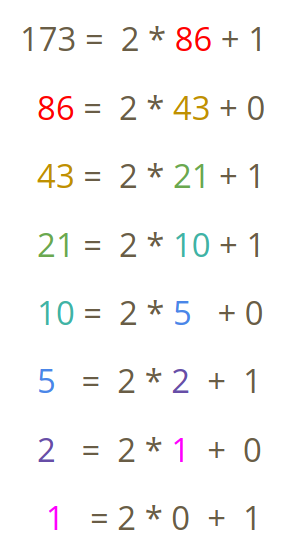

If we then read the remainders from bottom to top you get the binary representation of 173: **10101101**

</br></br>

Your task is to write **2 functions** - one which converts a decimal number to binary (in string format) and another which converts a binary number (ditto) to decimal.



In [ ]:
#input: an integer
#output: a string representation of a binary number
def dec_to_bin(n):
  #YOUR CODE HERE


#input: a string representation of a binary number
#output: an integer
def bin_to_dec(b):
  #YOUR CODE HERE



print(dec_to_bin(173))
print(bin_to_dec("10101101"))



Now that we've got those functions in place, it's pretty easy to use what we learned above about ascii values to write encode/decode functions that will translate plaintext messages in and out of binary.

Take a look at the code below for an example!

One thing to note that will help you understand the code: we want to represent all the binary numbers in **8 bits**. That means that is we have something like **1101** for 13, we want to pad it at the front with zeroes so that it becomes **00001101**. This is necessary to be able to decode the message.


In [ ]:
def encode_binary(m):
  res = ""
  for c in m:
    bin_val = dec_to_bin(ord(c))
    bin_val = "0"*(8-len(bin_val)) + bin_val
    res += bin_val
  return res


def decode_binary(m):
  res = ""
  while len(m) > 0:
    chunk = m[:8]
    res += chr(bin_to_dec(chunk))
    m = m[8:]
  return res

bin = encode_binary("It was a silence of three parts.")
print(bin)
dec = decode_binary(bin)
print(dec)